# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
data.fillna(value = '', inplace = True)
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

,keyword
,44
damage,36
siren,35
wreckage,34
fatalities,33
...,...
rescue,16
epicentre,10
radiation%20emergency,7
inundation,7


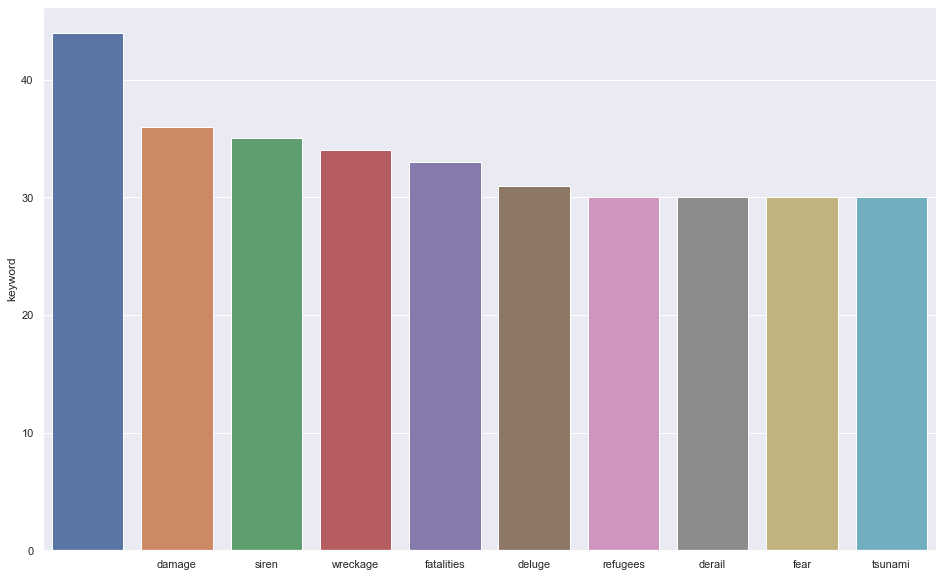

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc = {'figure.figsize':(16, 10)})

distribution = pd.DataFrame(train.keyword.value_counts())
sns.barplot(y = distribution.iloc[0:10].keyword, x = distribution.iloc[0:10].index)
distribution

## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
data.drop('id', inplace = True, axis = 1)

In [ ]:
data.head()

data['newtext'] = data['keyword'] + data['location'] + data['text']

train, test = train_test_split(data, test_size=0.3, random_state=42)
data

,keyword,location,text,target,newtext
0,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...
7608,,,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,,,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...
7610,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,,,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['newtext'])

cnt_matrix = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names())
cnt_matrix.shape

C:\Users\yadim\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5329, 22738)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
import re
from string import punctuation
print(punctuation)
def analyze(dictionary):
    nums = 0
    puncts = 0
    hasht = 0
    calls = 0

    for word in dictionary:
        if re.search('\d+', word) is not None:
            nums += 1
        if re.search('\W+' , word) is not None:
            puncts += 1
        if word[0] == '#':
            hasht += 1
        if word[0] == '@':
            calls += 1
    print('Contain numbers: ', nums, '\n Contain punctuation: ', puncts, 'Contain hashtags: ', hasht, '\n Contain @: ', calls )

analyze(cnt_vec.vocabulary_)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Contain numbers:  4590 
 Contain punctuation:  0 Contain hashtags:  0 
 Contain @:  0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()
cnt_vec = CountVectorizer(tokenizer = tw.tokenize)
cnt_vec.fit(train['newtext'])
X = cnt_vec.transform(train['newtext'])

cnt_matrix = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names())
analyze(cnt_vec.vocabulary_)
cnt_matrix
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

C:\Users\yadim\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Contain numbers:  4609 
 Contain punctuation:  7545 Contain hashtags:  1474 
 Contain @:  1678


,!,#,##youtube,#034,#039,#06,#09,#1-1st,#1008pla,#140,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Появились пунктуация, хэштеги и упоминания

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer
import re
from string import punctuation

def MyTokenizer(bow: str):
    tk = TweetTokenizer()
    stop = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    bow = bow.lower()
    tokens = tk.tokenize(bow)
    res = []

    for elem in tokens:
        if re.fullmatch('[A-Za-z]+', elem) != None:
            if elem not in stop:
                res.append(elem)
        elif (re.fullmatch(f'[{punctuation}]+', elem) != None) and (re.search('[()]', elem) != None):
            if elem not in stop:
                res.append(elem)
        elif re.fullmatch('#[A-Za-z]+', elem) != None:
            if elem not in stop:
                    res.append(elem)
    stemmed = [stemmer.stem(i) for i in res]
    return stemmed

MyTokenizer(train['newtext'][0:10].to_string())

['bridg',
 'australia',
 'col',
 'hailcarol',
 'stream',
 'illinoisgreat',
 'michigan',
 'techn',
 'policehouston',
 'cnn',
 'tennesse',
 'movi',
 'theater',
 'sho',
 'riotingstil',
 'riot',
 'coupl',
 'hour',
 'left',
 'woundslak',
 'highlandscrack',
 'path',
 'airplan',
 'thereexpert',
 'bloodyisol',
 'citi',
 'world',
 'came',
 'k',
 'burn',
 'except',
 'idk',
 'r',
 'destroyh',
 '(',
 'ask',
 ')',
 'destroy',
 'hous',
 'woundedmaracay',
 'nirgua',
 'venezuelapolic',
 'offic']

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
#split to X, y

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(data['newtext'], data['target'], random_state=42)

In [ ]:
vec = CountVectorizer(tokenizer = MyTokenizer)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)


#scaler = MinMaxScaler() # Use maxabsscaler instead
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [ ]:
clf = LogisticRegression(max_iter = 200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred)) #0.83, 0.73

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1091
           1       0.80      0.67      0.73       813

    accuracy                           0.79      1904
   macro avg       0.79      0.77      0.78      1904
weighted avg       0.79      0.79      0.78      1904



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(tokenizer = MyTokenizer, max_df=0.7, min_df=0.00005)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [ ]:
clf = LogisticRegression(max_iter = 500, random_state=1253)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred)) #0.82, 0.74

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1091
           1       0.78      0.70      0.74       813

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(tokenizer = MyTokenizer, n_features=5000)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

C:\Users\yadim\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
clf = LogisticRegression(max_iter = 200, random_state=321)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred)) #0.79, 0.70

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1091
           1       0.73      0.67      0.70       813

    accuracy                           0.75      1904
   macro avg       0.75      0.74      0.74      1904
weighted avg       0.75      0.75      0.75      1904



## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

В 8 задании f1 мера почти удовлетворяет заданию( Лучшего результата перебором гиперпараметров добиться не удалось